Name : Kevin Aditya Pratama Student ID : 1101220014

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns                       
import matplotlib.pyplot as plt

Memasukkan data csv

In [35]:
zh = pd.read_csv("motor_data.csv")

Tampilkan 6 data teratas

In [37]:
zh = pd.read_csv("motor_data.csv")

,Handle,Title,Price,Launch Year,Tags,Engine Capacity,Fuel Type,Color Options,Top Speed,Horsepower,Country of Origin
0,yamaha-brand,Yamaha,15000,2023,sport,600cc,Petrol,"Blue, Red",220,100,Japan
1,honda-brand,Honda,14000,2022,sport,500cc,Petrol,"Black, White",200,90,Japan
2,suzuki-brand,Suzuki,13000,2021,sport,650cc,Petrol,"Silver, Green",210,95,Japan
3,kawasaki-brand,Kawasaki,18000,2022,sport,1000cc,Petrol,"Black, Green",250,150,Japan
4,ducati-brand,Ducati,22000,2023,premium,1200cc,Petrol,"Red, Black",280,170,Italy
5,honda-brand,Honda,14500,2021,sport,500cc,Petrol,"Black, Yellow",200,95,Japan


Tampilkan 4 data terbawah

In [39]:
zh.tail(4)

,Handle,Title,Price,Launch Year,Tags,Engine Capacity,Fuel Type,Color Options,Top Speed,Horsepower,Country of Origin
21,honda-brand,Honda Shadow,14000,2020,cruiser,750cc,Petrol,"Black, Silver",160,80,Japan
22,suzuki-brand,Suzuki Intruder,16000,2022,cruiser,800cc,Petrol,"Black, Red",180,95,Japan
23,kawasaki-brand,Kawasaki Ninja 400,12000,2021,sport,400cc,Petrol,"Green, Black",180,50,Japan
24,ducati-brand,Ducati Panigale V2,25000,2023,sport,950cc,Petrol,"Red, White",270,150,Italy


Melihat tipe data

In [41]:
zh.dtypes

Handle               object
Title                object
Price                 int64
Launch Year           int64
Tags                 object
Engine Capacity      object
Fuel Type            object
Color Options        object
Top Speed             int64
Horsepower            int64
Country of Origin    object
dtype: object

Menghapus kolom yang tidak perlu

In [45]:
zh = zh.drop(['Handle','Color Options','Tags','Launch Year'], axis=1)
zh.head(6)

,Title,Price,Engine Capacity,Fuel Type,Top Speed,Horsepower,Country of Origin
0,Yamaha,15000,600cc,Petrol,220,100,Japan
1,Honda,14000,500cc,Petrol,200,90,Japan
2,Suzuki,13000,650cc,Petrol,210,95,Japan
3,Kawasaki,18000,1000cc,Petrol,250,150,Japan
4,Ducati,22000,1200cc,Petrol,280,170,Italy
5,Honda,14500,500cc,Petrol,200,95,Japan


Ganti nama kolom

In [49]:
zh = zh.rename(columns={"Title":"Merek","Price":"Harga","Engine Capacity":"Kapasitas Mesin"})
zh.head(6)

,Merek,Harga,Kapasitas Mesin,Fuel Type,Top Speed,Horsepower,Country of Origin
0,Yamaha,15000,600cc,Petrol,220,100,Japan
1,Honda,14000,500cc,Petrol,200,90,Japan
2,Suzuki,13000,650cc,Petrol,210,95,Japan
3,Kawasaki,18000,1000cc,Petrol,250,150,Japan
4,Ducati,22000,1200cc,Petrol,280,170,Italy
5,Honda,14500,500cc,Petrol,200,95,Japan


Mencari dan menunjukkan data terduplikat

In [51]:
duplicate_zh=zh[zh.duplicated()]
print("Duplicated Data:", duplicate_zh)

Duplicated Data: Empty DataFrame
Columns: [Merek, Harga, Kapasitas Mesin, Fuel Type, Top Speed, Horsepower, Country of Origin]
Index: []


Mengecek jumlah nilai hilang sebelum menghapus

In [53]:
print(zh.isnull().sum())

Merek                0
Harga                0
Kapasitas Mesin      0
Fuel Type            0
Top Speed            0
Horsepower           0
Country of Origin    0
dtype: int64


Menghapus baris yang memiliki nilai hilang

In [57]:
zh = zh.dropna()

Mengecek jumlah nilai non-null setelah menghapus

In [59]:
print(zh.count())

Merek                25
Harga                25
Kapasitas Mesin      25
Fuel Type            25
Top Speed            25
Horsepower           25
Country of Origin    25
dtype: int64


Memeriksa kembali apakah masih ada nilai hilang

In [61]:
print(zh.isnull().sum())

Merek                0
Harga                0
Kapasitas Mesin      0
Fuel Type            0
Top Speed            0
Horsepower           0
Country of Origin    0
dtype: int64


Deteksi Outlier dengan boxplot

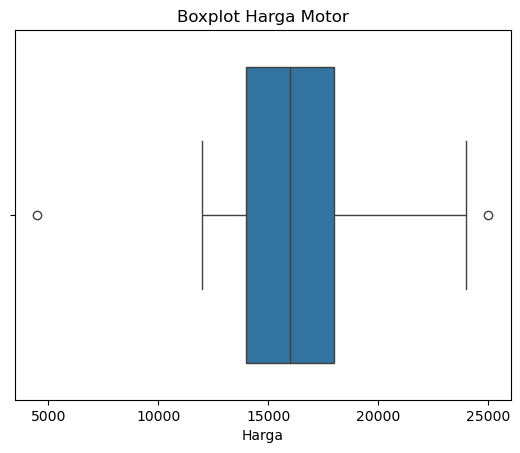

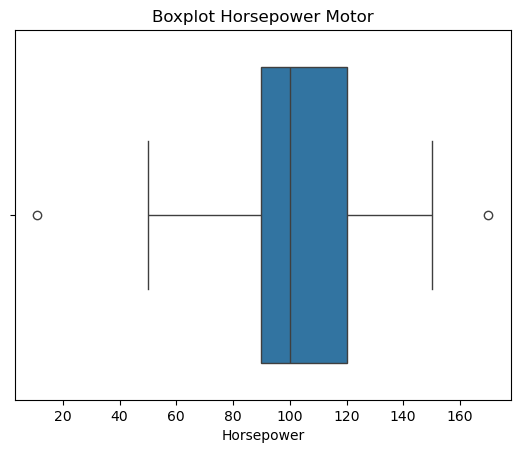

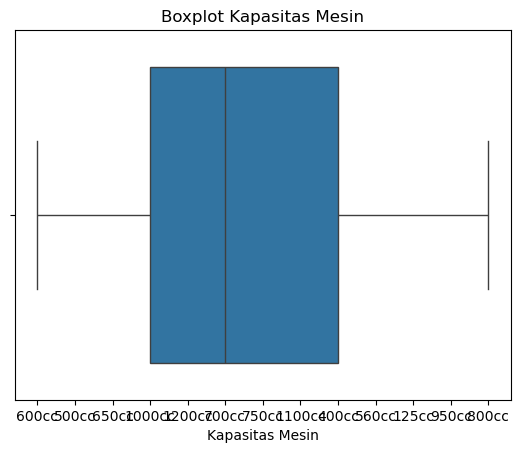

In [65]:
sns.boxplot(x=zh['Harga'])
plt.title('Boxplot Harga Motor')
plt.show()

sns.boxplot(x=zh['Horsepower'])
plt.title('Boxplot Horsepower Motor')
plt.show()

sns.boxplot(x=zh['Kapasitas Mesin']) 
plt.title('Boxplot Kapasitas Mesin')
plt.show()

Pilih hanya kolom numerik dan Hitung Q1, Q3, dan IQR

In [71]:
zh_numeric = zh.select_dtypes(include=['number'])
Q1 = zh_numeric.quantile(0.25)
Q3 = zh_numeric.quantile(0.75)
IQR = Q3 - Q1

Buang outlier hanya pada kolom numerik

In [73]:
zh_numeric_cleaned = zh_numeric[~((zh_numeric < (Q1 - 1.5 * IQR)) | 
(zh_numeric > (Q3 + 1.5 * IQR))).any(axis=1)]
zh_cleaned = zh.loc[zh_numeric_cleaned.index]
print(zh_cleaned.shape)

(22, 7)


Menampilkan jumlah motor berdasarkan Horsepower

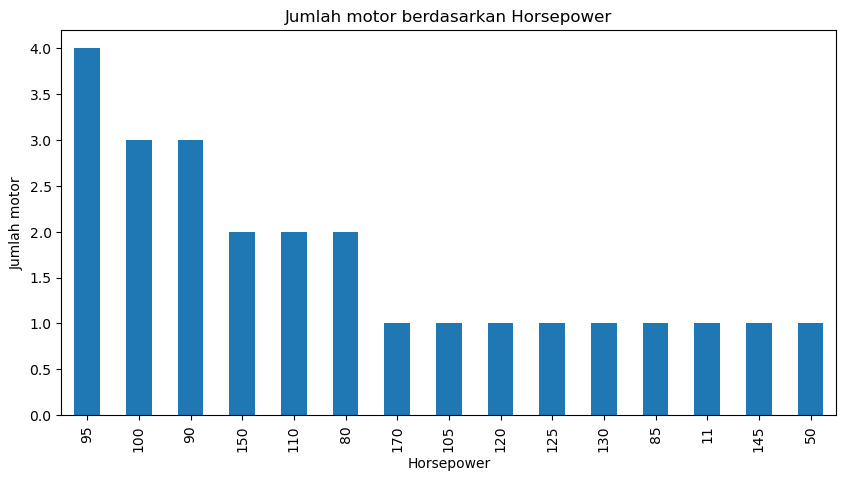

In [83]:
zh.Horsepower.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Jumlah motor berdasarkan Horsepower")
plt.ylabel('Jumlah motor')
plt.xlabel('Horsepower')
plt.show()

Memilih hanya kolom numerik sebelum menghitung korelasi

In [85]:
zh_numeric = zh.select_dtypes(include=['number'])

Menghitung korelasi antar kolom numerik

In [87]:
c = zh_numeric.corr()

Plot heatmap korelasi

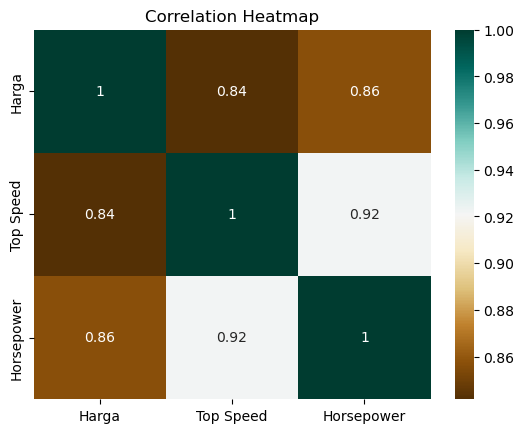

In [89]:
sns.heatmap(c, cmap="BrBG", annot=True)
plt.title("Correlation Heatmap")
plt.show()

Membuat scatter plot antara Horsepower dan Kapasitas Mesin

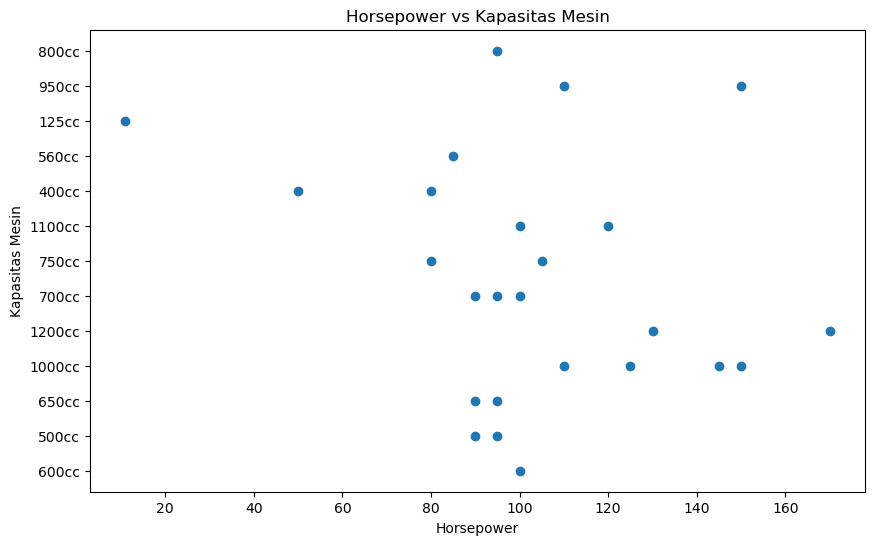

In [93]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(zh['Horsepower'], zh['Kapasitas Mesin'])
ax.set_xlabel('Horsepower')
ax.set_ylabel('Kapasitas Mesin')
plt.title("Horsepower vs Kapasitas Mesin")
plt.show()